In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt
import shapely
from sympy import Symbol, solve
from shapely import Point
from shapely import box
from itertools import combinations

Ser=    [-500,   0,   0,   0,   0]                      # Ps, Vsx, Vsy, Msx, Msy
Uls=    [-1000,   0,   0,   1000,   0]                      # Pu, Vux, Vuy, Mux, Muy
Pile=   [1300,  300,     200,     0.5,     3,     0.1]      # P, V, T Capacity of Pile, Diameter of Pile, Pile Spacing, Embed depth
Mat=    [24,    400,     0.05,     22]                      # f'c, fy, cc, Rebar Dia
SpW=    [0,       0,       0,       0]                      # Surchage, Conc, Soil, height
Ped=    [0.5,   0.8]                                        # Pedestal Size
w=      SpW[0]+(SpW[1]+SpW[2])/2*SpW[3]                     # Average of Specific Weight
S=      Pile[3]*Pile[4]

c:\Users\HEC\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\HEC\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\HEC\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [6]:
Xi=     np.array([
        [0, 0,    0, -S/2, -S*3/4, -S/2,       0, -S*9/10, -S,       0],
        [0, 0, -S/2,  S/2,  S*3/4,  S/2, -S*9/10,  S*9/10,  0, -S*9/10],
        [0, 0,  S/2, -S/2,      0, -S/2,  S*9/10,       0,  S,  S*9/10],
        [0, 0,    0,  S/2, -S*3/4,  S/2,       0, -S*9/10, -S,       0],
        [0, 0,    0,    0,  S*3/4, -S/2, -S*9/10,  S*9/10,  0, -S*9/10],
        [0, 0,    0,    0,      0,  S/2,  S*9/10,       0,  S,  S*9/10],
        [0, 0,    0,    0,      0,    0,       0, -S*9/10, -S,       0],
        [0, 0,    0,    0,      0,    0,       0,  S*9/10,  0, -S*9/10],
        [0, 0,    0,    0,      0,    0,       0,       0,  S,  S*9/10],
        [0, 0,    0,    0,      0,    0,       0,       0,  0,       0],
                 ])


Yi=     np.array([
        [0,  S/2,   S*3/5,  S/2,  S*3/4,  S,    S,    S,  S,  S*3/2],
        [0, -S/2, -S*3/10,  S/2,  S*3/4,  S,  S/2,    S,  S,      S],
        [0,    0, -S*3/10, -S/2,      0,  0,  S/2,  S/2,  S,      S],
        [0,    0,       0, -S/2, -S*3/4,  0,    0,    0,  0,    S/2],
        [0,    0,       0,    0, -S*3/4, -S, -S/2,    0,  0,      0],
        [0,    0,       0,    0,      0, -S, -S/2, -S/2,  0,      0],
        [0,    0,       0,    0,      0,  0,   -S,   -S, -S,   -S/2],
        [0,    0,       0,    0,      0,  0,    0,   -S, -S,     -S],
        [0,    0,       0,    0,      0,  0,    0,    0, -S,     -S],
        [0,    0,       0,    0,      0,  0,    0,    0,  0, -S*3/2],
                ])

Lxy=    np.array([
         [S,   S,     2*S, 2*S, S*5/2, 2*S, 28*S/10, 28*S/10, 3*S, 28*S/10],
         [S, 2*S, 19*S/10, 2*S, 5*S/2, 3*S,     3*S,     3*S, 3*S,     4*S]
                ])

Xi2=    Xi**2
Yi2=    Yi**2



In [7]:
nlat=   math.ceil(max(Ser[1],Ser[2])/Pile[1])
nver=   math.ceil(Ser[0]/Pile[0])
n=      max(nlat,nver,3)

Pxser =    [
           (Ser[0]+(w*Lxy[0][n-1]*Lxy[1][n-1]))/n+(abs(Ser[4])*Xi[i][n-1])/Xi2.sum(axis=0)[n-1]+(abs(Ser[3])*Yi[i][n-1])/Yi2.sum(axis=0)[n-1]
           for i in range(n)
           ]

Pyser =    [
           (Ser[0]+(w*Lxy[0][n-1]*Lxy[1][n-1]))/n+(abs(Ser[3])*Xi[i][n-1])/Xi2.sum(axis=0)[n-1]+(abs(Ser[4])*Yi[i][n-1])/Yi2.sum(axis=0)[n-1]
           for i in range(n)
           ]

In [8]:
while (np.max(Pxser)>=Pile[0] or (np.min(Pxser)<=0 and abs(np.min(Pxser))>=Pile[2])) and (np.max(Pyser)>=Pile[0] or (np.min(Pyser)<=0 and abs(np.min(Pyser))>=Pile[2])):      # NG 조건
               
        n = n+1                 # NG 조건 시, n을 1씩 늘려서 진행

        Pxser =    [
        (Ser[0]+(w*Lxy[0][n-1]*Lxy[1][n-1]))/n+(abs(Ser[4])*Xi[i][n-1])/Xi2.sum(axis=0)[n-1]+(abs(Ser[3])*Yi[i][n-1])/Yi2.sum(axis=0)[n-1]
        for i in range(n)
                   ]
                        
        Pyser =    [
        (Ser[0]+(w*Lxy[0][n-1]*Lxy[1][n-1]))/n+(abs(Ser[3])*Xi[i][n-1])/Xi2.sum(axis=0)[n-1]+(abs(Ser[4])*Yi[i][n-1])/Yi2.sum(axis=0)[n-1]
        for i in range(n)
                   ]

        if n > 10:              # n 개수 9 이상은 다루지 않음
                print('이건 사람 불러야돼')
                break

else :
        n = n
        Pxser = Pxser
        Pyser = Pyser

if np.max(Pxser)<Pile[0] and (np.min(Pxser)>0 or abs(np.min(Pxser))<Pile[2]):                           # X 방향 배치가 OK 일 시
        dir = 1
        print("Pile n = " + str(n))
        print("Pxser = " + str(Pxser))
        print("Ps = " + str(Pile[0]) + " > " + str(np.max(Pxser)))

        if np.min(Pxser)>0:
                print("Ts = " + str(Pile[2]) + " > 0")
        else :
                print("Ts = " + str(Pile[2]) + " > " + str(abs(np.min(Pxser))))

elif np.max(Pyser)<Pile[0] and (np.min(Pyser)>0 or abs(np.min(Pyser))<Pile[2]):                         # Y 방향 배치가 OK 일 시
        dir = 2
        print("Pile n = " + str(n))
        print("Pyser = " + str(Pyser))
        print("Ps = " + str(Pile[0]) + " > " + str(np.max(Pyser)))
        
        if np.min(Pyser)>0:
                print("Ts = " + str(Pile[2]) + " > 0")
        else :
                print("Ts = " + str(Pile[2]) + " > " + str(abs(np.min(Pyser))))      

Pile n = 3
Pxser = [-166.66666666666666, -166.66666666666666, -166.66666666666666]
Ps = 1300 > -166.66666666666666
Ts = 200 > 166.66666666666666


In [9]:
Pxuls =    [
        (Uls[0]+(w*Lxy[0][n-1]*Lxy[1][n-1]))/n+(abs(Uls[4])*Xi[i][n-1])/Xi2.sum(axis=0)[n-1]+(abs(Uls[3])*Yi[i][n-1])/Yi2.sum(axis=0)[n-1]
        for i in range(n)
           ]

Pyuls =    [
        (Uls[0]+(w*Lxy[0][n-1]*Lxy[1][n-1]))/n+(abs(Uls[3])*Xi[i][n-1])/Xi2.sum(axis=0)[n-1]+(abs(Uls[4])*Yi[i][n-1])/Yi2.sum(axis=0)[n-1]
        for i in range(n)
           ]

if dir == 1:
    P = Pxuls               # 계수하중에 의한 Pile 반력 (X 방향 배치가 OK일 시)

elif dir == 2:
    P = Pyuls               # 계수하중에 의한 Pile 반력 (Y 방향 배치가 OK일 시)

print("Puls = " + str(P))
print(Lxy[0][n-1],Lxy[1][n-1])

Puls = [407.4074074074072, -703.7037037037036, -703.7037037037036]
3.0 2.85


In [10]:
def Ceil(x):
    return (x*20-x*20%1+1)/20                                               # 0.05 올림 식 정의
def ΦVc1a(x):
    return Pi*vc*2*(Cx+Cy+2*x)*x                                            # 2 Way Shear at d/2 from Column face 식 정의
def ΦVc1b(x):
    return Pi*vc*2*(Cx+Cy)*x                                                # 2 Way Shear at d/2 from Column face 식 정의 (Special Provision)
def ΦVc2(x,y):
    return Pi*vc/2*x*y                                                      # 1 Way Shear at d from Column face 식 정의
def ΦVc3a(x):
    return Pi*vc*math.pi*(Pile[3]+x)*x                                      # 2 Way Shear at d/2 from Pile (Internal) 식 정의 1
def ΦVc3b(x):
    return Pi*vc*(math.pi*(Pile[3]+x)+2*S)*x                                # 2 Way Shear at d/2 from Pile (Internal) 식 정의 2
def ΦVc4a(x):
    return Pi*vc*(math.pi*(Pile[3]+x)/4+math.sqrt(2)*S+(Pile[3]+x))*x       # 2 Way Shear at Corner Pile 식 정의 1
def ΦVc4b(x):
    return Pi*vc*(math.pi*(Pile[3]+x)/4+S)*x                                # 2 Way Shear at Corner Pile 식 정의 2
def ΦVc5(x):
    return Pi*vc/2*(math.sqrt(2)*S+(Pile[3]+x))*x                           # 1 Way Shear at Corner Pile 식 정의

Pi = 0.75
λ = 1
vc = 0.33 * λ * math.sqrt(Mat[0]) * 1000                                    # 2 way shear 기준 vc (1 way는 이 값의 절반 사용)

# Pedestal Size Estimation (Square)

Cx = Ped[0]
Cy = Ped[1]

print (Cx,Cy)


0.5 0.8


In [11]:
d = Symbol('d')

PileLocation = [
               Point(Xi[i,n-1],Yi[i,n-1]).buffer(Pile[3]/2, quad_segs=500)
               for i in range(n)
               ]

dt = 0.25

while True : 

    # 2 way shear at d/2 from column face

    d1 = dt
    SpecialProvision = box(-(Cx/2),-(Cy/2),(Cx/2),(Cy/2))

    while True :

        TwoWayCritical = box(-(Cx/2+d1/2),-(Cy/2+d1/2),(Cx/2+d1/2),(Cy/2+d1/2))

        TwoWayReaction = [
                        (round(math.pi*(Pile[3]/2)**2,3)-round(shapely.intersection(PileLocation[i],TwoWayCritical).area,3))/round(math.pi*(Pile[3]/2)**2,3)*P[i]
                        for i in range(n)
                        ]
        if sum(TwoWayReaction)>ΦVc1a(d1) :
            d1 = d1 + 0.05
        elif sum(TwoWayReaction) == 0 :
            SpecialProvisionReaction = [
                                    (round(math.pi*(Pile[3]/2)**2,3)-round(shapely.intersection(PileLocation[i],SpecialProvision).area,3))/round(math.pi*(Pile[3]/2)**2,3)*P[i]
                                    for i in range(n)
                                    ]
            d1 = Ceil(sum(SpecialProvisionReaction)/(Pi*vc*2*(Cx+Cy)))
            break
        else :
            d1 = d1
            break

    # 1 way shear at d from column face

    d2 = dt

    SpecialProvision1 = box(min([Xi[i][n-1] for i in range(n)])-S/2,min([Yi[i][n-1] for i in range(n)])-S/2,max([Xi[i][n-1] for i in range(n)])+S/2,(Cy/2))
    SpecialProvision2 = box(min([Xi[i][n-1] for i in range(n)])-S/2,min([Yi[i][n-1] for i in range(n)])-S/2,(Cx/2),max([Yi[i][n-1] for i in range(n)])+S/2)
    SpecialProvision3 = box(min([Xi[i][n-1] for i in range(n)])-S/2,-(Cy/2),max([Xi[i][n-1] for i in range(n)])+S/2,max([Yi[i][n-1] for i in range(n)])+S/2)
    SpecialProvision4 = box(-(Cx/2),min([Yi[i][n-1] for i in range(n)])-S/2,max([Xi[i][n-1] for i in range(n)])+S/2,max([Yi[i][n-1] for i in range(n)])+S/2)

    while True :

        OneWayCritical1 = box(min([Xi[i][n-1] for i in range(n)])-S/2,min([Yi[i][n-1] for i in range(n)])-S/2,max([Xi[i][n-1] for i in range(n)])+S/2,(Cy/2+d2))
        OneWayCritical2 = box(min([Xi[i][n-1] for i in range(n)])-S/2,min([Yi[i][n-1] for i in range(n)])-S/2,(Cx/2+d2),max([Yi[i][n-1] for i in range(n)])+S/2)
        OneWayCritical3 = box(min([Xi[i][n-1] for i in range(n)])-S/2,-(Cy/2+d2),max([Xi[i][n-1] for i in range(n)])+S/2,max([Yi[i][n-1] for i in range(n)])+S/2)
        OneWayCritical4 = box(-(Cx/2+d2),min([Yi[i][n-1] for i in range(n)])-S/2,max([Xi[i][n-1] for i in range(n)])+S/2,max([Yi[i][n-1] for i in range(n)])+S/2)

        OneWayReaction1 = [
                        (round(math.pi*(Pile[3]/2)**2,3)-round(shapely.intersection(PileLocation[i],OneWayCritical1).area,3))/round(math.pi*(Pile[3]/2)**2,3)*P[i]
                        for i in range(n)
                        ]
        OneWayReaction2 = [
                        (round(math.pi*(Pile[3]/2)**2,3)-round(shapely.intersection(PileLocation[i],OneWayCritical2).area,3))/round(math.pi*(Pile[3]/2)**2,3)*P[i]
                        for i in range(n)
                        ]
        OneWayReaction3 = [
                        (round(math.pi*(Pile[3]/2)**2,3)-round(shapely.intersection(PileLocation[i],OneWayCritical3).area,3))/round(math.pi*(Pile[3]/2)**2,3)*P[i]
                        for i in range(n)
                        ]
        OneWayReaction4 = [
                        (round(math.pi*(Pile[3]/2)**2,3)-round(shapely.intersection(PileLocation[i],OneWayCritical4).area,3))/round(math.pi*(Pile[3]/2)**2,3)*P[i]
                        for i in range(n)
                        ]
        SpecialProvisionReaction1 = [
                                    (round(math.pi*(Pile[3]/2)**2,3)-round(shapely.intersection(PileLocation[i],SpecialProvision1).area,3))/round(math.pi*(Pile[3]/2)**2,3)*P[i]
                                    for i in range(n)
                                    ]
        SpecialProvisionReaction2 = [
                                    (round(math.pi*(Pile[3]/2)**2,3)-round(shapely.intersection(PileLocation[i],SpecialProvision2).area,3))/round(math.pi*(Pile[3]/2)**2,3)*P[i]
                                    for i in range(n)
                                    ]
        SpecialProvisionReaction3 = [
                                    (round(math.pi*(Pile[3]/2)**2,3)-round(shapely.intersection(PileLocation[i],SpecialProvision3).area,3))/round(math.pi*(Pile[3]/2)**2,3)*P[i]
                                    for i in range(n)
                                    ]
        SpecialProvisionReaction4 = [
                                    (round(math.pi*(Pile[3]/2)**2,3)-round(shapely.intersection(PileLocation[i],SpecialProvision4).area,3))/round(math.pi*(Pile[3]/2)**2,3)*P[i]
                                    for i in range(n)
                                    ]
        if sum(OneWayReaction1)>ΦVc2(d2,Lxy[0][n-1]) or sum(OneWayReaction2)>ΦVc2(d2,Lxy[1][n-1]) or sum(OneWayReaction3)>ΦVc2(d2,Lxy[0][n-1]) or sum(OneWayReaction4)>ΦVc2(d2,Lxy[1][n-1]) :
            d2 = d2 + 0.05
        elif round(sum(OneWayReaction1),3) == 0 and round(sum(OneWayReaction1),3) == 0 and round(sum(OneWayReaction1),3) == 0 and round(sum(OneWayReaction1),3) == 0 :
            d2 = max(Ceil((sum(SpecialProvisionReaction1)/(Pi*vc/2*Lxy[0][n-1]))),Ceil((sum(SpecialProvisionReaction2)/(Pi*vc/2*Lxy[1][n-1]))),Ceil((sum(SpecialProvisionReaction3)/(Pi*vc/2*Lxy[0][n-1]))),Ceil((sum(SpecialProvisionReaction4)/(Pi*vc/2*Lxy[1][n-1]))))
            break
        else :
            d2 = d2
            break

    # 2 Way Shear at d/2 from Pile (Internal)

    def create_circle_dict(circles, attribute):
        return {'Poly': circles, 'Reaction': attribute}

    def distance_between_circles(circle1, circle2):
        return round(circle1['Poly'].centroid.distance(circle2['Poly'].centroid),2)

    def find_circle_combinations(circles, target_distance):
        combination_list = []
        for circle1, circle2 in combinations(circles, 2):
            distance = distance_between_circles(circle1, circle2)
            if distance < target_distance:
                combination_list.append((circle1, circle2))
        return combination_list

    def calculate_attribute_sum(combination):
        return sum([circle['Reaction'] for circle in combination])

    PileLandR = [create_circle_dict(PileLocation[i], P[i]) for i in range(n)]

    PileGroup = find_circle_combinations(PileLandR, 1.1*S)

    attribute_sum = [
                    calculate_attribute_sum(combination) for combination in PileGroup
                    ]

    d3a = Ceil(max(solve(ΦVc3a(d)-max(list(map(abs,P))),d)))
    d3b = Ceil(max(solve(ΦVc3b(d)-max(attribute_sum),d)))

    if d3a <= (S-Pile[3])/2:
        d3 = d3a

    else :
        d3 = d3b

    # 2 Way Shear at Corner Pile & 1 Way Shear at Corner Pile

    def find_circles_distance_from_edge1(circles):
        res_edge1 = []
        for circle in circles:
            distance_x = abs(min(Xi[i][n-1] for i in range(n)))+S/2 - abs(circle['Poly'].centroid.x)
            distance_y = abs(min(Yi[i][n-1] for i in range(n)))+S/2 - abs(circle['Poly'].centroid.y)
            if (distance_x < 1.1*S/2) and (distance_y < 1.1*S/2) :
                res_edge1.append(circle)
        return res_edge1

    def find_circles_distance_from_edge2(circles):
        res_edge2 = []
        for circle in circles:
            distance_x = abs(min(Xi[i][n-1] for i in range(n)))+S/2 - abs(circle['Poly'].centroid.x)
            distance_y = abs(min(Yi[i][n-1] for i in range(n)))+S/2 - abs(circle['Poly'].centroid.y)
            if ((distance_x < 1.1*S/2) and (distance_y > 1.1*S/2)) or ((distance_x > 1.1*S/2) and (distance_y < 1.1*S/2)) :
                res_edge2.append(circle)
        return res_edge2

    def Reaction_Extract(circles):
        res_reaction = []
        for circle in circles:
            res_reaction.append(circle['Reaction'])
        return res_reaction

    def max_in_list(lst):
        if lst:  
            return max(lst)
        else: 
            return 0

    if max_in_list(map(abs,Reaction_Extract(find_circles_distance_from_edge1(PileLandR)))) < max_in_list(map(abs,Reaction_Extract(find_circles_distance_from_edge2(PileLandR)))) : 
        d4 = Ceil(max(solve(ΦVc4a(d)-max_in_list(map(abs,Reaction_Extract(find_circles_distance_from_edge2(PileLandR)))),d)))
    else :
        d4 = Ceil(max(solve(ΦVc4b(d)-max_in_list(map(abs,Reaction_Extract(find_circles_distance_from_edge1(PileLandR)))),d)))

    d5 = Ceil(max(solve(ΦVc5(d)-max_in_list(map(abs,Reaction_Extract(find_circles_distance_from_edge1(PileLandR)))),d)))

    dt = float(max(d1,d2,d3,d4,d5))

    # 2 way shear at d/2 from column face Vu 계산

    TwoWayCriticalDC = box(-(Cx/2+dt/2),-(Cy/2+dt/2),(Cx/2+dt/2),(Cy/2+dt/2))

    TwoWayReactionDC = [
            (round(math.pi*(Pile[3]/2)**2,3)-round(shapely.intersection(PileLocation[i],TwoWayCriticalDC).area,3))/round(math.pi*(Pile[3]/2)**2,3)*P[i]
            for i in range(n)
            ]
    Vu1 = abs(sum(TwoWayReactionDC))

    if Vu1 > 0 or Vu1 < 0 : 
        Vu1 = Vu1
        ΦVc1 = ΦVc1a(dt)
    else :
        Vu1 = max(abs(sum(SpecialProvisionReaction1)),abs(sum(SpecialProvisionReaction2)),abs(sum(SpecialProvisionReaction3)),abs(sum(SpecialProvisionReaction4)))
        ΦVc1 = ΦVc1b(dt)

    # 1 way shear at d from column face Vu 계산

    OneWayCritical1DC = box(min([Xi[i][n-1] for i in range(n)])-S/2,min([Yi[i][n-1] for i in range(n)])-S/2,max([Xi[i][n-1] for i in range(n)])+S/2,(Cy/2+dt))
    OneWayCritical2DC = box(min([Xi[i][n-1] for i in range(n)])-S/2,min([Yi[i][n-1] for i in range(n)])-S/2,(Cx/2+dt),max([Yi[i][n-1] for i in range(n)])+S/2)
    OneWayCritical3DC = box(min([Xi[i][n-1] for i in range(n)])-S/2,-(Cy/2+dt),max([Xi[i][n-1] for i in range(n)])+S/2,max([Yi[i][n-1] for i in range(n)])+S/2)
    OneWayCritical4DC = box(-(Cx/2+dt),min([Yi[i][n-1] for i in range(n)])-S/2,max([Xi[i][n-1] for i in range(n)])+S/2,max([Yi[i][n-1] for i in range(n)])+S/2)

    OneWayReaction1DC = [
                    (round(math.pi*(Pile[3]/2)**2,3)-round(shapely.intersection(PileLocation[i],OneWayCritical1DC).area,3))/round(math.pi*(Pile[3]/2)**2,3)*P[i]
                    for i in range(n)
                    ]
    OneWayReaction2DC = [
                    (round(math.pi*(Pile[3]/2)**2,3)-round(shapely.intersection(PileLocation[i],OneWayCritical2DC).area,3))/round(math.pi*(Pile[3]/2)**2,3)*P[i]
                    for i in range(n)
                    ]
    OneWayReaction3DC = [
                    (round(math.pi*(Pile[3]/2)**2,3)-round(shapely.intersection(PileLocation[i],OneWayCritical3DC).area,3))/round(math.pi*(Pile[3]/2)**2,3)*P[i]
                    for i in range(n)
                    ]
    OneWayReaction4DC = [
                    (round(math.pi*(Pile[3]/2)**2,3)-round(shapely.intersection(PileLocation[i],OneWayCritical4DC).area,3))/round(math.pi*(Pile[3]/2)**2,3)*P[i]
                    for i in range(n)
                    ]

    if (sum(OneWayReaction1DC) or sum(OneWayReaction3DC)) == max(sum(OneWayReaction1DC),sum(OneWayReaction2DC),sum(OneWayReaction3DC),sum(OneWayReaction4DC)) :
        L = Lxy[0][n-1]
    else : 
        L = Lxy[1][n-1]

    Vu2 = max(abs(sum(OneWayReaction1DC)),abs(sum(OneWayReaction2DC)),abs(sum(OneWayReaction3DC)),abs(sum(OneWayReaction4DC)))

    if Vu2 > 0 or Vu2 < 0 : 
        Vu2 = Vu2
    else : 
        Vu2 = max(abs(sum(SpecialProvisionReaction1)),abs(sum(SpecialProvisionReaction2)),abs(sum(SpecialProvisionReaction3)),abs(sum(SpecialProvisionReaction4)))
        if (sum(SpecialProvisionReaction1) or sum(SpecialProvisionReaction3)) == max(sum(SpecialProvisionReaction1),sum(SpecialProvisionReaction2),sum(SpecialProvisionReaction3),sum(SpecialProvisionReaction4)) :
            L = Lxy[0][n-1]
        else : 
            L = Lxy[1][n-1]

    # 2 Way Shear at d/2 from Pile (Internal) Vu 계산

    if dt <= (S-Pile[3])/2 :
        Vu3 = max(list(map(abs,P)))
        ΦVc3 = ΦVc3a(dt)
    else :
        Vu3 = max(attribute_sum)
        ΦVc3 = ΦVc3b(dt)

    # 2 Way Shear at Corner Pile & 1 Way Shear at Corner Pile Vu 계산

    if max_in_list(map(abs,Reaction_Extract(find_circles_distance_from_edge1(PileLandR)))) < max_in_list(map(abs,Reaction_Extract(find_circles_distance_from_edge2(PileLandR)))) : 
        Vu4 = max_in_list(map(abs,Reaction_Extract(find_circles_distance_from_edge2(PileLandR))))
        ΦVc4 = ΦVc4a(dt)
    else :
        Vu4 = max_in_list(map(abs,Reaction_Extract(find_circles_distance_from_edge1(PileLandR))))
        ΦVc4 = ΦVc4b(dt)

    Vu5 = max_in_list(map(abs,Reaction_Extract(find_circles_distance_from_edge1(PileLandR))))

    if round(ΦVc1,3)>round(Vu1,3) and round(ΦVc2(dt,L),3)>round(Vu2,3) and round(ΦVc3,3)>round(Vu3,3) and round(ΦVc4,3)>round(Vu4,3) and round(ΦVc5(dt),3)>round(Vu5,3) :
        break

print("n = " + str(n) + " Pile")
print("d = " + str(round(dt,2)) + " (Governing Thickness)")
print("2 Way Shear at d/2 From Column Face\n" + "    ΦVc = " + str(round(ΦVc1,3)) + " kN\n" + "    Vu = " + str(round(Vu1,3)) + " kN")
print("1 Way Shear at d From Column Face\n" + "    ΦVc = " + str(round(ΦVc2(dt,L),3)) + " kN\n" + "    Vu = " + str(round(Vu2,3)) + " kN")
print("2 Way Shear at d/2 from Pile\n" + "    ΦVc = " + str(round(ΦVc3,3)) + " kN\n" + "    Vu = " + str(round(Vu3,3)) + " kN")
print("2 Way Shear at Corner Pile\n" + "    ΦVc = " + str(round(ΦVc4,3)) + " kN\n" + "    Vu = " + str(round(Vu4,3)) + " kN")
print("1 Way Shear at Corner Pile\n" + "    ΦVc = " + str(round(ΦVc5(dt),3)) + " kN\n" + "    Vu = " + str(round(Vu5,3)) + " kN")
print(round(d1,2),round(d2,2),round(d3,2),round(d4,2),round(d5,2))

n = 3 Pile
d = 0.4 (Governing Thickness)
2 Way Shear at d/2 From Column Face
    ΦVc = 2036.996 kN
    Vu = 1000.0 kN
1 Way Shear at d From Column Face
    ΦVc = 727.498 kN
    Vu = 524.187 kN
2 Way Shear at d/2 from Pile
    ΦVc = 1371.302 kN
    Vu = 703.704 kN
2 Way Shear at Corner Pile
    ΦVc = 1070.324 kN
    Vu = 703.704 kN
1 Way Shear at Corner Pile
    ΦVc = 732.669 kN
    Vu = 703.704 kN
0.25 0.25 0.25 0.30 0.40


In [12]:
Depth = dt+Pile[5]+Mat[2]
Conc = Lxy[0][n-1]*Lxy[1][n-1]*Depth

print("Total Depth of FDN\n" + "    D = " + str(round(Depth,3)) + " m")
print("FDN Conc Volumne\n" + "    V = " + str(round(Conc,3)) + " m3")

Total Depth of FDN
    D = 0.55 m
FDN Conc Volumne
    V = 4.703 m3


In [21]:
# Mu 계산

def find_circles_distance_from_axis(circles,location):
    res_x1 = []
    res_x2 = []
    res_y1 = []
    res_y2 = []
    if location == 'xplus' :
        for circle in circles:
            distance = circle['Poly'].centroid.x 
            if distance > 0.01 :
                res_x1.append(circle)
        return res_x1
    elif location == 'xminus' :
        for circle in circles:
            distance = circle['Poly'].centroid.x 
            if distance < -0.01 :
                res_x2.append(circle)
        return res_x2
    elif location == 'yplus' :
        for circle in circles:
            distance = circle['Poly'].centroid.y
            if distance > 0.01 :
                res_y1.append(circle)
        return res_y1
    elif location == 'yminus' :
        for circle in circles:
            distance = circle['Poly'].centroid.y 
            if distance < -0.01 :
                res_y2.append(circle)
        return res_y2

def calculate_distance_attribute_product(circle,direction):
    if direction == 'xdir' :
        distance = abs(circle['Poly'].centroid.x)-Cx/2
        return distance * float(circle['Reaction'])
    if direction == 'ydir' :
        distance = abs(circle['Poly'].centroid.y)-Cy/2
        return distance * float(circle['Reaction'])

def Total_Moment(circles,direction) :
    res_mom = []
    for circle in circles :
        res_mom.append(calculate_distance_attribute_product(circle,direction))
    return sum(res_mom)

circles_within_Xdistance1 = find_circles_distance_from_axis(PileLandR,'xplus')
circles_within_Xdistance2 = find_circles_distance_from_axis(PileLandR,'xminus')
circles_within_Ydistance1 = find_circles_distance_from_axis(PileLandR,'yplus')
circles_within_Ydistance2 = find_circles_distance_from_axis(PileLandR,'yminus')

Muxbot = abs(max(Total_Moment(circles_within_Xdistance1,'xdir'),Total_Moment(circles_within_Xdistance2,'xdir'),0))
Muxtop = abs(min(Total_Moment(circles_within_Xdistance1,'xdir'),Total_Moment(circles_within_Xdistance2,'xdir'),0))
Muybot = abs(max(Total_Moment(circles_within_Ydistance1,'ydir'),Total_Moment(circles_within_Ydistance2,'ydir'),0))
Muytop = abs(min(Total_Moment(circles_within_Ydistance1,'ydir'),Total_Moment(circles_within_Ydistance2,'ydir'),0))

#각 방향별 휨 철근 설계

if Muxbot <= Muybot : 
    dxbot = (dt - Mat[3]/(2*1000))*1000
    dybot = (dt - 3*Mat[3]/(2*1000))*1000
if Muxbot > Muybot : 
    dxbot = (dt - 3*Mat[3]/(2*1000))*1000
    dybot = (dt - Mat[3]/(2*1000))*1000
if Muxtop <= Muytop : 
    dxtop = (dt - Mat[3]/(2*1000))*1000
    dytop = (dt - 3*Mat[3]/(2*1000))*1000
if Muxtop > Muytop : 
    dxtop = (dt - 3*Mat[3]/(2*1000))*1000
    dytop = (dt - Mat[3]/(2*1000))*1000

def a1(depth,Mu) :
    return ((-0.9*0.85*Mat[0]*1000*depth)+((0.9*0.85*Mat[0]*1000*depth)**2-4*(-0.9*0.85*Mat[0]*1000*0.5)*(-Mu*10**6/Lxy[1][n-1]))**0.5)/(2*(-0.9*0.85*Mat[0]*1000*0.5))
def a2(depth,Mu) : 
    return ((-0.9*0.85*Mat[0]*1000*depth)-((0.9*0.85*Mat[0]*1000*depth)**2-4*(-0.9*0.85*Mat[0]*1000*0.5)*(-Mu*10**6/Lxy[0][n-1]))**0.5)/(2*(-0.9*0.85*Mat[0]*1000*0.5))

if a1(dxbot,Muxbot) < 0 :
    a = a2(dxbot,Muxbot)
if a2(dxbot,Muxbot) < 0 : 
    a = a1(dxbot,Muxbot)
if a1(dxbot,Muxbot) > dxbot : 
    a = a2(dxbot,Muxbot)
if a2(dxbot,Muxbot) > dxbot : 
    a = a1(dxbot,Muxbot)
if a1(dybot,Muybot) < 0 :
    b = a2(dybot,Muybot)
if a2(dybot,Muybot) < 0 : 
    b = a1(dybot,Muybot)
if a1(dybot,Muybot) > dybot : 
    b = a2(dybot,Muybot)
if a2(dybot,Muybot) > dybot : 
    b = a1(dybot,Muybot)
if a1(dxtop,Muxtop) < 0 :
    c = a2(dxtop,Muxtop)
if a2(dxtop,Muxtop) < 0 : 
    c = a1(dxtop,Muxtop)
if a1(dxtop,Muxtop) > dxtop : 
    c = a2(dxtop,Muxtop)
if a2(dxtop,Muxtop) > dxtop : 
    c = a1(dxtop,Muxtop)
if a1(dytop,Muytop) < 0 :
    d = a2(dytop,Muytop)
if a2(dytop,Muytop) < 0 : 
    d = a1(dytop,Muytop)
if a1(dytop,Muytop) > dytop : 
    d = a2(dytop,Muytop)
if a2(dytop,Muytop) > dytop : 
    d = a1(dytop,Muytop)


print("Muxbot = ", round(Muxbot,0), "kNm (", round(Muxbot,0)/Lxy[1][n-1], " kNm/m)")
Asxbot = max(0.85*Mat[0]*a*1000/Mat[1], 0.002*1000*(dt+Mat[2])*1000)
print ("Asxbot = ", round(Asxbot,0), "mm2/m")
print ("    = ", round(Asxbot,0) * Lxy[1][n-1], "mm2")
sy1 = int(1000/(Asxbot/((Mat[3]/2)**2*3.141592))/50)*50
print ("D",Mat[3],"@",sy1)

print("Muybot = ", round(Muybot,0), "kNm (", round(Muybot,0)/Lxy[0][n-1], " kNm/m)")
Asybot = max(0.85*Mat[0]*b*1000/Mat[1], 0.002*1000*(dt+Mat[2])*1000)
print ("Asybot = ", round(Asybot,0), "mm2/m")
print ("    = ", round(Asybot,0) * Lxy[0][n-1], "mm2")
sy2 = int(1000/(Asybot/((Mat[3]/2)**2*3.141592))/50)*50
print ("D",Mat[3],"@",sy2)

print("Muxtop = ", round(Muxtop,0), "kNm (", round(Muxtop,0)/Lxy[1][n-1], " kNm/m)")
Asxtop = max(0.85*Mat[0]*c*1000/Mat[1], 0.002*1000*(dt+Mat[2])*1000)
print ("Asxtop = ", round(Asxtop,0), "mm2/m")
print ("    = ", round(Asxtop,0) * Lxy[1][n-1], "mm2")
sy3 = int(1000/(Asxtop/((Mat[3]/2)**2*3.141592))/50)*50
print ("D",Mat[3],"@",sy3)

print("Muytop = ", round(Muytop,0), "kNm (", round(Muytop,0)/Lxy[0][n-1], " kNm/m)")
Asytop = max(0.85*Mat[0]*d*1000/Mat[1], 0.002*1000*(dt+Mat[2])*1000)
print ("Asytop = ", round(Asytop,0), "mm2/m")
print ("    = ", round(Asytop,0) * Lxy[0][n-1], "mm2")
sy4 = int(1000/(Asytop/((Mat[3]/2)**2*3.141592))/50)*50
print ("D",Mat[3],"@",sy4)

Muxbot =  0 kNm ( 0.0  kNm/m)
Asxbot =  900.0 mm2/m
    =  2565.0 mm2
D 22 @ 400
Muybot =  204.0 kNm ( 68.0  kNm/m)
Asybot =  900.0 mm2/m
    =  2700.0 mm2
D 22 @ 400
Muxtop =  352.0 kNm ( 123.50877192982456  kNm/m)
Asxtop =  959.0 mm2/m
    =  2733.15 mm2
D 22 @ 350
Muytop =  70.0 kNm ( 23.333333333333332  kNm/m)
Asytop =  900.0 mm2/m
    =  2700.0 mm2
D 22 @ 400


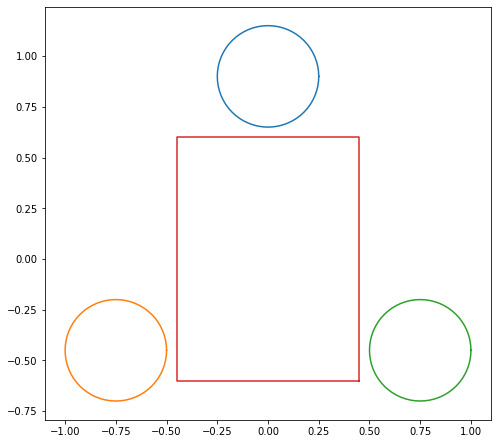

In [22]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.axes.set_aspect(aspect=1)

for i in range(n):
    plt.plot(*Point(Xi[i,n-1],Yi[i,n-1]).buffer(Pile[3]/2).exterior.xy)
plt.plot(*box(-(Cx/2+dt/2),-(Cy/2+dt/2),(Cx/2+dt/2),(Cy/2+dt/2)).exterior.xy)

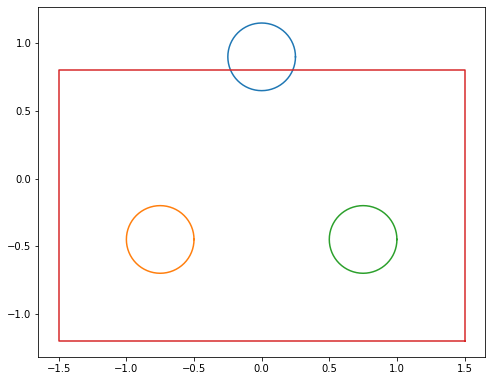

In [23]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.axes.set_aspect(aspect=1)

for i in range(n):
    plt.plot(*Point(Xi[i,n-1],Yi[i,n-1]).buffer(Pile[3]/2).exterior.xy)
plt.plot(*OneWayCritical1DC.exterior.xy)

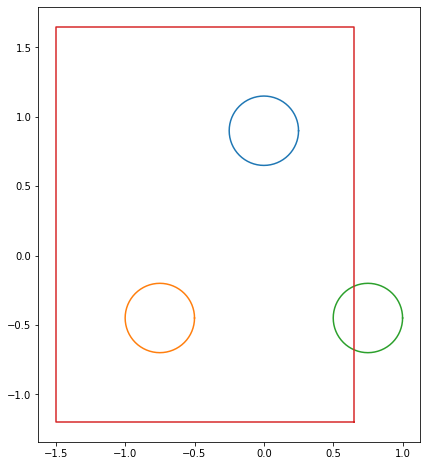

In [24]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.axes.set_aspect(aspect=1)

for i in range(n):
    plt.plot(*Point(Xi[i,n-1],Yi[i,n-1]).buffer(Pile[3]/2).exterior.xy)
plt.plot(*OneWayCritical2DC.exterior.xy)